# Protein Exploration Notebook

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import average_precision_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# Load Datasets

In [3]:
#Load Datasets

protein_df = pd.read_csv('../data/raw/ProteinAndPathologyQuantifications.csv')
Donor_df = pd.read_csv('../data/raw/DonorInformation.csv')
Stains_df = pd.read_csv('../data/raw/DescriptionOfStains.csv')
gene_expression_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/fpkm_table_normalized.csv')
gene_expression_unnormalized_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/fpkm_table_unnormalized.csv')
columns_samples_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/columns-samples.csv')
rows_genes_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/rows-genes.csv')



In [4]:
# Create df of donors ids and corresponding diagnosis, this will be used to map to the proteins data samples
donor_labels_df = Donor_df[['donor_id','act_demented']]

In [5]:
donor_labels_df

,donor_id,act_demented
0,326765665,No Dementia
1,326765656,No Dementia
2,326765654,Dementia
3,467056391,No Dementia
4,309335447,Dementia
...,...,...
102,309335458,Dementia
103,309335462,Dementia
104,309335454,No Dementia
105,309335486,No Dementia


In [6]:
# Map donor_labels_df to protein_df so each sample will be associated with the appropriate diagnosis 
donor_labels_dict = donor_labels_df.set_index('donor_id')['act_demented'].to_dict()
protein_df['dementia_status'] = protein_df['donor_id'].map(donor_labels_dict)

In [7]:
#Examine protein_df to ensure labels properly populated
protein_df

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,326765653,H14.09.066,10208,PCx,0.000046,0.001989,0.000533,0.000082,0.001130,0.003128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dementia
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,No Dementia
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,No Dementia
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,Dementia


In [8]:
#Check the distribution of Dementia in Protein samples dataset
print('No Dementia: ', len(protein_df[protein_df['dementia_status']=='No Dementia']))
print('Dementia: ', len(protein_df[protein_df['dementia_status']=='Dementia']))

No Dementia:  197
Dementia:  180


# Handling Missing Data

In [9]:
#check for Nan
total_nan_count = protein_df.isna().sum()


In [10]:
#total_nan_count

In [11]:
# Process dataframe by Dropping Nan
# - drop isoprostane_pg_per_mg because missing most of the data (63% of samples missing isoprostane data)
# - dropna for remaining columns (will still represent >70% of the samples)

protein_df_drop_cleaned = protein_df.drop('isoprostane_pg_per_mg',axis=1)
protein_df_drop_cleaned.dropna(inplace = True)

In [12]:
# Check for Nan after cleaning
total_nan_count = protein_df_drop_cleaned.isna().sum()
#total_nan_count

In [13]:
# protein_df_drop_cleaned has samples with corresponding dementia labels and no missing values. 
# Represents total of 279 samples from original 377 samples (74%)
# Dropping missing values was the strategy choosen since biological systems are complex and variability between
# individuals could be significant. Filling missing values through imputation could potentially skew the data.

In [14]:
# Protein groups
# There are 28 different protein measures, however there are only 14 distinct proteins. 
# Some measures are different methods of measuring the same protein, for example ihc_a_syn is measuring the 
# stain area coverage for α-synuclein, while a_syn_pg_per_mg is measuring the concentration of a_syn_pg_per_mg

# Amyloid: ihc_a_beta, ab42_over_ab40_ratio, ihc_a_beta_ffpe, ab42_pg_per_mg, ab40_pg_per_mg
# α-synuclein:ihc_a_syn, a_syn_pg_per_mg
# interferon: ifn_g_pg_per_mg
# RANTES: rantes_pg_per_mg
# Tau: ihc_tau2_ffpe, ptau_over_tau_ratio, ptau_ng_per_mg, ihc_at8, ihc_at8_ffpe, tau_ng_per_mg
# Isoprostane: isoprostane_pg_per_mg
# BDNF: bdnf_pg_per_mg
# MIP-1a: mip_1a_pg_per_mg
# Interleukins: il_4_pg_per_mg, il_1b_pg_per_mg, il_7_pg_per_mg, il_6_pg_per_mg, il_10_pg_per_mg
# MCP-1: mcp_1_pg_per_mg
# IBA-1: ihc_iba1_ffpe
# phospho-TDP43: ihc_ptdp_43_ffpe
# GFAP:ihc_gfap_ffpe
# TNF: Tumor Necrosis Factor alpha

In [15]:
#View list of columns
columns = protein_df_drop_cleaned.columns
columns

Index(['donor_id', 'donor_name', 'structure_id', 'structure_acronym',
       'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',
       'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe',
       'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg',
       'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg',
       'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg',
       'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg',
       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg',
       'il_7_pg_per_mg', 'ab42_pg_per_mg', 'dementia_status'],
      dtype='object')

In [16]:
# columns to keep for training
# dropping catergorical columns as well as donor_id/donor_name and dementia status

columns_keep_for_training = [
       'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',
       'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe',
       'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg',
       'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg',
       'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg',
       'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg',
       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg',
       'il_7_pg_per_mg', 'ab42_pg_per_mg']

In [17]:
protein_df_drop_cleaned

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,326765668,H14.09.081,10294,HIP,0.000122,0.006376,0.026056,0.025917,0.001646,0.009597,...,4.56,5.170612,0.115779,0.00,3.50,11.53213,19.72,1.38,457.402238,No Dementia
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,No Dementia
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,No Dementia
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,Dementia


# Custom Functions

In [ ]:
# Adapted from functions created by Camaron Mangham

In [18]:
def train_models(models, model_names, X_train, y_train, X_val, y_val):
    score_names = ['accuracy',
                   'precision',
                   'recall',
                   'f1',
                    #   'roc_auc'
                      ]
    scores = []
    for name, model in zip(model_names, models):
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        accuracy_scores = accuracy_score(y_val, preds)
        precision_scores = precision_score(y_val, preds)
        recall_scores = recall_score(y_val, preds)
        f1_scores = f1_score(y_val,preds)
        # roc_auc_scores = roc_auc_score(y_val,preds)

        scores.append([accuracy_scores,
                       precision_scores,
                       recall_scores,
                       f1_scores,
                        # roc_auc_scores
                        ])

    model_scores = pd.DataFrame(scores, index= model_names, columns= score_names)

    return model_scores

In [19]:
def custom_train_test_split(protein_df ,donor_ids):
    # 70, 30 Train, Test split
    # np.random.seed(42)
    train_ids, test_ids = train_test_split(donor_ids, test_size=0.30)
    # print(len(train_ids), len(test_ids))

    #samples (rna_profile_ids) by donor data splt
    train_df = protein_df[protein_df['donor_id'].isin(train_ids)].drop(columns='donor_id')
    test_df = protein_df[protein_df['donor_id'].isin(test_ids)].drop(columns='donor_id')

    # final data prep
    X_train = train_df.drop(columns='dementia_status')
    y_train = train_df['dementia_status']

    X_test = test_df.drop(columns='dementia_status')
    y_test = test_df['dementia_status']

    # Scale data and transform data
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    y_train = y_train.apply(lambda x: 1 if x == 'Dementia' else 0)
    y_test = y_test.apply(lambda x: 1 if  x=='Dementia' else 0)


    return X_train, y_train, X_test, y_test

In [20]:
def train_models_boot_data(protein_df,donor_ids, models, model_names, iterations=1000):
    score_names = ['Accuracy',
                   'Precision',
                   'Recall',
                   'F1',
                      ]
    scores_accuracy = []
    scores_precision = []
    scores_recall = []
    scores_f1 = []
    for i in range(iterations + 1):
        X_train, y_train, X_test, y_test = custom_train_test_split(protein_df,donor_ids)
        scores_accuracy_i = []
        scores_precision_i = []
        scores_recall_i = []
        scores_f1_i = []
        for name, model in zip(model_names, models):
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

            scores_accuracy_i.append(accuracy_score(y_test, preds))
            scores_precision_i.append(precision_score(y_test, preds))
            scores_recall_i.append(recall_score(y_test, preds))
            scores_f1_i.append(f1_score(y_test,preds))

        scores_accuracy.append(scores_accuracy_i)
        scores_precision.append(scores_precision_i)
        scores_recall.append(scores_recall_i)
        scores_f1.append(scores_f1_i)

    scores_list = [scores_accuracy, scores_precision, scores_recall, scores_f1]
    model_scores_dict = {}
    for name, scores in zip(score_names, scores_list):
        model_scores_dict[name] = pd.DataFrame(scores, columns= model_names)

    return model_scores_dict

In [21]:
def subplot_plot_model_scores(model_scores, protein_df, score_name, ax=None):
    sort_order = np.argsort(model_scores.mean().values)
    descending_sort = sort_order[::-1]
    sorted_labels = model_scores.iloc[:, descending_sort].columns

    # Use the provided subplot or create a new one
    if ax is None:
        plt.figure(figsize=(10, 6))
        ax = plt.gca()

    sns.boxplot(model_scores.iloc[:, descending_sort], orient='h', palette='Spectral', ax=ax)
    y_labels = sorted_labels
    ax.set_yticks(range(len(y_labels)))
    ax.set_yticklabels(y_labels)
    ax.set_xlabel(f'{score_name} Score')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axvline(0.5,color="gray",linestyle="--")

In [22]:
# Using nan dropped data

donor_ids = list(protein_df_drop_cleaned['donor_id'].unique())
protein_df = protein_df_drop_cleaned.drop(columns = ['donor_name', 'structure_id','structure_acronym'])

protein_df

,donor_id,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,ihc_a_beta,ihc_iba1_ffpe,ihc_gfap_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,0.004596,0.029660,0.047025,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,0.008108,0.051882,0.057511,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,0.017214,0.057172,0.033150,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,0.003868,0.049068,0.043767,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,0.046244,0.045467,0.023337,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,326765668,0.000122,0.006376,0.026056,0.025917,0.001646,0.009597,0.008976,0.082264,0.041019,...,4.56,5.170612,0.115779,0.00,3.50,11.53213,19.72,1.38,457.402238,No Dementia
373,309335452,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,0.010057,0.086936,0.054531,...,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,No Dementia
374,309335489,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,0.006445,0.066469,0.044727,...,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,No Dementia
375,309335458,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,0.020585,0.033144,0.058040,...,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,Dementia


In [23]:
# Checking Multicollinearity of Features
# Used tutorial from scikit-learn
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py

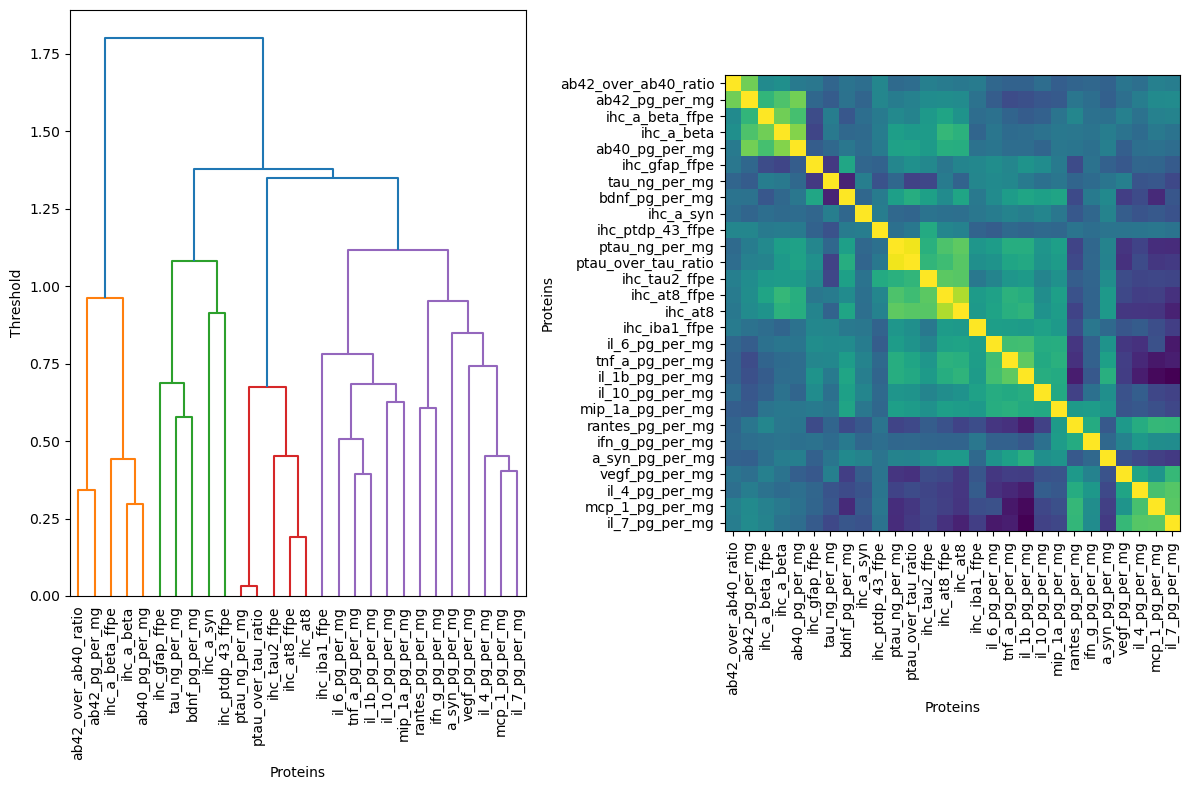

In [24]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

X = protein_df.drop(columns=['donor_id','dementia_status'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.to_list(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])

ax1.set_xlabel('Proteins')
ax1.set_ylabel('Threshold')

ax2.set_xlabel('Proteins')
ax2.set_ylabel('Proteins')

_ = fig.tight_layout()

In [24]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 0.75, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features_names = X.columns[selected_features]
selected_features_names = list(selected_features_names)


In [25]:
#Create new df from selected 

selected_features_names.append('donor_id')
selected_features_names.append('dementia_status')

protein_df_select = protein_df[selected_features_names]
protein_df_select

,ihc_a_syn,ihc_tau2_ffpe,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,ihc_iba1_ffpe,ihc_gfap_ffpe,vegf_pg_per_mg,ab42_over_ab40_ratio,tnf_a_pg_per_mg,rantes_pg_per_mg,a_syn_pg_per_mg,donor_id,dementia_status
0,0.000078,0.002358,0.001259,0.008335,0.029660,0.047025,0.33,710.898317,0.00,15.99,0.122288,309335467,No Dementia
1,0.000063,0.002762,0.002354,0.005047,0.051882,0.057511,1.82,121.797394,0.00,24.04,0.111962,309335480,Dementia
2,0.000064,0.003468,0.001708,0.007365,0.057172,0.033150,1.02,639.498049,0.00,129.80,0.091084,309335493,Dementia
3,0.000049,0.003035,0.001729,0.004046,0.049068,0.043767,2.92,63.183129,0.00,15.16,0.054076,326765668,No Dementia
4,0.000080,0.002088,0.001513,0.015809,0.045467,0.023337,2.46,4.574780,0.00,17.90,0.030000,326765668,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.000122,0.006376,0.001646,0.009597,0.082264,0.041019,0.18,88.461906,26.98,4.56,0.115779,326765668,No Dementia
373,0.000089,0.001918,0.001181,0.003483,0.086936,0.054531,0.50,0.094713,15.24,5.94,0.248816,309335452,No Dementia
374,0.000066,0.002275,0.001395,0.001710,0.066469,0.044727,0.00,0.201517,22.08,7.62,0.183510,309335489,No Dementia
375,0.000793,0.004384,0.002505,0.009795,0.033144,0.058040,0.18,463.447721,0.00,4.88,0.045202,309335458,Dementia


In [26]:
X_train_sel, y_train, X_test_sel, y_test = custom_train_test_split(protein_df_select,donor_ids)

RF_list = [RandomForestClassifier(random_state =42)]



train_models(RF_list, ['Default RF'], X_train_sel, y_train, X_test_sel, y_test)


,accuracy,precision,recall,f1
Default RF,0.612903,0.560976,0.560976,0.560976


In [27]:
X_train, y_train, X_test, y_test = custom_train_test_split(protein_df,donor_ids)
RF_list = [RandomForestClassifier(random_state =42)]


train_models(RF_list, ['Default RF'], X_train, y_train, X_test, y_test)


,accuracy,precision,recall,f1
Default RF,0.688312,0.69697,0.621622,0.657143


In [28]:
def multicollinear_analysis(threshold, X, df, classifier):
    from scipy.cluster import hierarchy
    from scipy.spatial.distance import squareform
    from scipy.stats import spearmanr
    from collections import defaultdict
    
    corr = spearmanr(X).correlation
    
    # Ensure the correlation matrix is symmetric
    corr = (corr + corr.T) / 2
    np.fill_diagonal(corr, 1)

    # We convert the correlation matrix to a distance matrix before performing
    # hierarchical clustering using Ward's linkage.
    distance_matrix = 1 - np.abs(corr)
    dist_linkage = hierarchy.ward(squareform(distance_matrix))
    dendro = hierarchy.dendrogram(
        dist_linkage, labels=X.columns.to_list(), ax=ax1, leaf_rotation=90
    )
    dendro_idx = np.arange(0, len(dendro["ivl"]))
    
    cluster_ids = hierarchy.fcluster(dist_linkage, threshold, criterion="distance")
    cluster_id_to_feature_ids = defaultdict(list)
    for idx, cluster_id in enumerate(cluster_ids):
        cluster_id_to_feature_ids[cluster_id].append(idx)
    selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
    selected_features_names = X.columns[selected_features]
    selected_features_names = list(selected_features_names)
    
    selected_features_names.append('donor_id')
    selected_features_names.append('dementia_status')

    protein_df_select = protein_df[selected_features_names]
    
    X_train_sel, y_train, X_test_sel, y_test = custom_train_test_split(protein_df_select,donor_ids)
    clf_list = [classifier]
    results = train_models(RF_list, ['Classifier'], X_train_sel, y_train, X_test_sel, y_test)
    return (results, selected_features_names)



In [29]:
X = protein_df.drop(columns=['donor_id','dementia_status'])

thresholds = [0,0.25,.5,.75,1,1.25,1.5]
df = protein_df

for threshold in thresholds:
    print('Threshold: ', threshold)
    results, features = multicollinear_analysis(threshold, X, df,RandomForestClassifier(random_state =42))
    print(results)
    print(features)
    print()


Threshold:  0
            accuracy  precision    recall     f1
Classifier  0.634146   0.568182  0.694444  0.625
['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg', 'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg', 'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg', 'donor_id', 'dementia_status']

Threshold:  0.25
            accuracy  precision    recall        f1
Classifier  0.712644   0.806452  0.568182  0.666667
['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg'

# Bootstrapping

In [31]:
# Define models to test
# Code from Camaron Mangham

models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(kernel="linear", random_state=42),
    SVC(kernel="rbf", random_state=42),
    GaussianNB(),
    GradientBoostingClassifier(random_state=42),
    # DummyClassifier(strategy="most_frequent", random_state=42),
]

# List of model_names for output
model_names = [
    "Log_Reg",
    "DT",
    "RF",
    "SVM_linear",
    "SVM_radial",
    "GaussianNB",
    "Gradient_boosted",
    # "Dummy_most_freq",
]

In [32]:
selected_features = ['donor_id','ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_a_beta_ffpe', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 
                     'vegf_pg_per_mg','dementia_status']

protein_df_selected_features = protein_df[selected_features]

selected_features_names = ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_a_beta_ffpe', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 
                     'vegf_pg_per_mg']

In [33]:
model_scores_dict = train_models_boot_data(protein_df_selected_features,donor_ids, models, model_names, iterations= 1000)


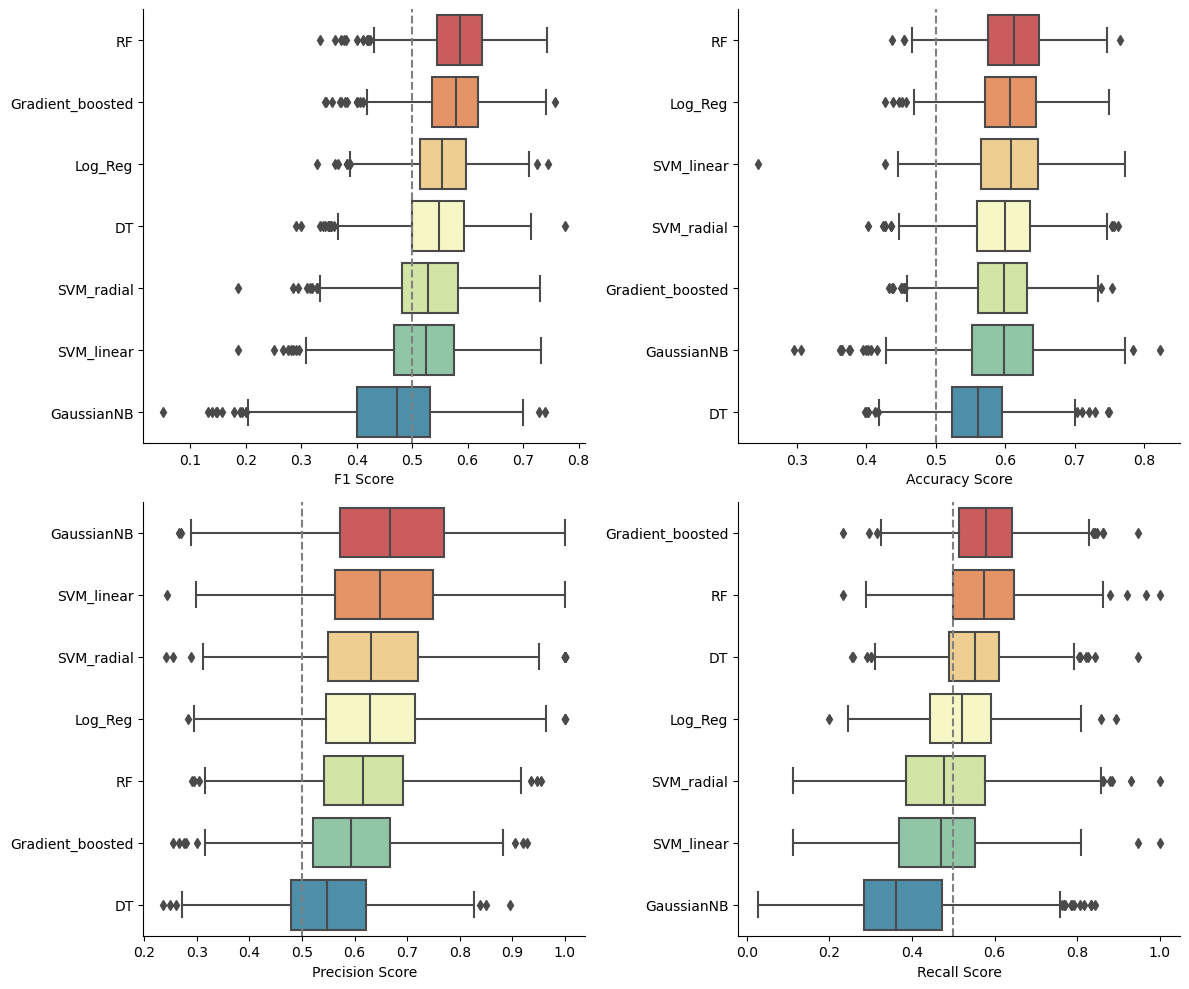

In [34]:
### PLOT
# Code from Camaron Mangham

metrics = ['F1', 'Accuracy', 'Precision', 'Recall']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through the metrics and plot on the corresponding subplot
for i, metric in enumerate(metrics):
    row = i // 2  # Determine the row of the subplot
    col = i % 2   # Determine the column of the subplot

    # model_scores = train_models_boot_data(ml_df,donor_ids, samples, models, model_names, metric)


    # Call your function with the specified subplot
    subplot_plot_model_scores(model_scores_dict[metric], protein_df, metric, ax=axes[row, col])

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Show the plot
plt.show()

# Random Forest

In [ ]:
# Code adapted from Camaron Mangham

In [35]:
train_scores = []
test_scores = []
coefs = []
for i in range(1000):
    X_train, y_train, X_test, y_test = custom_train_test_split(protein_df_selected_features,donor_ids)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    imps = permutation_importance(clf, X_test, y_test, random_state=42, scoring= 'f1')
    coefs.append(imps.importances_mean)

    preds = clf.predict(X_train)
    f1_score_train = f1_score(y_train,preds)
    train_scores.append(np.round(f1_score_train,4))

    preds = clf.predict(X_test)
    f1_score_test = f1_score(y_test,preds)
    test_scores.append(np.round(f1_score_test,4))

print('Training on Shuffled Donor IDs...')
print(f"After {i} iterations:")

print('First 3 scores...')
print('Train Scores (F1): ', train_scores[1:4])
print('Test Scores (F1): ', test_scores[1:4])

print('mean Train: ', np.round(np.mean(train_scores),4))
print('mean Test: ',np.round(np.mean(test_scores),4))

print('Training std : ', np.round(np.std(train_scores),4))
print('Testing std : ', np.round(np.std(test_scores),4))

Training on Shuffled Donor IDs...
After 999 iterations:
First 3 scores...
Train Scores (F1):  [1.0, 1.0, 1.0]
Test Scores (F1):  [0.6, 0.701, 0.5974]
mean Train:  1.0
mean Test:  0.5826
Training std :  0.0
Testing std :  0.0635


In [36]:
# Code from Camaron Mangham

coefs_df = pd.DataFrame(coefs)
coefs_mean = coefs_df.T.mean(axis=1)
coefs_sem = coefs_df.T.sem(axis=1)

protein_list = selected_features_names

protein_ids_ranking = (
pd.DataFrame.from_dict({k:v for k,v in zip(protein_list, coefs_mean)}, orient = 'index', columns= ['importance'])
.rename_axis('protein_id')
.reset_index()
.sort_values(by='importance', ascending= False)
)

sort_order = np.argsort(coefs_mean.values)
descending_sort = sort_order[::-1]

protein_ids_ranking
protein_ids_ranking['sem'] = coefs_sem

protein_ids_ranking

,protein_id,importance,sem
1,ihc_tau2_ffpe,0.081977,0.001587
4,ihc_gfap_ffpe,0.038930,0.001233
2,ihc_a_beta_ffpe,0.031101,0.001108
5,vegf_pg_per_mg,0.007653,0.000998
3,ihc_iba1_ffpe,0.005563,0.001042
0,ihc_a_syn,-0.004515,0.001122


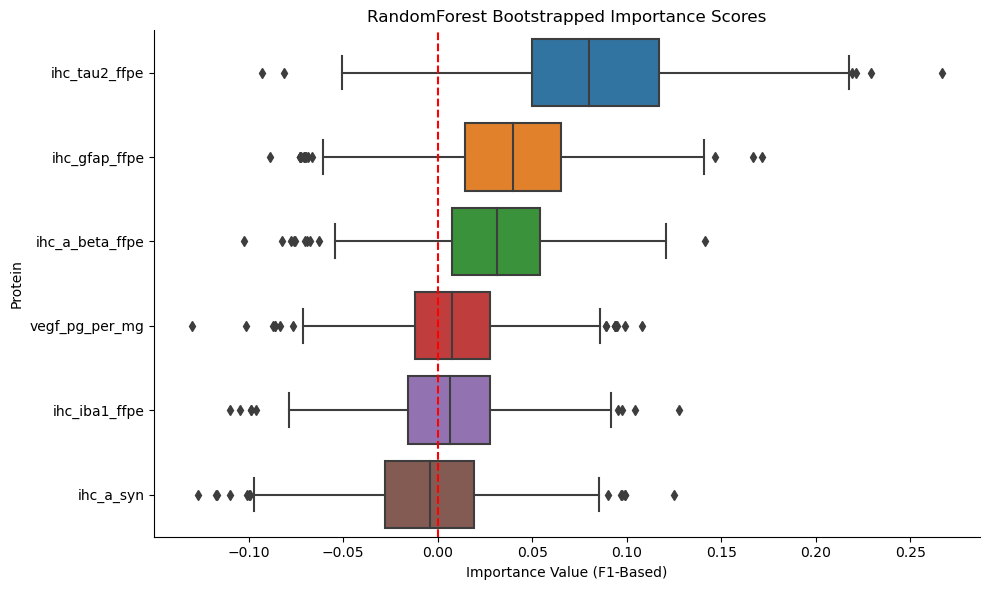

In [37]:
# Code from Camaron Mangham

plt.figure(figsize=(10, 6))
sns.boxplot(coefs_df[descending_sort], orient= 'h',)
y_labels = protein_ids_ranking['protein_id']
plt.yticks(range(len(y_labels)), y_labels)
plt.title('RandomForest Bootstrapped Importance Scores')
plt.xlabel('Importance Value (F1-Based)')
plt.ylabel('Protein')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0,color="red",linestyle="--")
plt.tight_layout()
plt.show()

# GradientBoostingClassifier

In [38]:
# Code from Camaron Mangham

train_scores = []
test_scores = []
coefs = []
for i in range(1000):
    X_train, y_train, X_test, y_test = custom_train_test_split(protein_df_selected_features,donor_ids)
    clf = GradientBoostingClassifier(random_state=42)
    clf.fit(X_train, y_train)

    imps = permutation_importance(clf, X_test, y_test, random_state=42, scoring= 'f1')
    coefs.append(imps.importances_mean)

    preds = clf.predict(X_train)
    f1_score_train = f1_score(y_train,preds)
    train_scores.append(np.round(f1_score_train,4))

    preds = clf.predict(X_test)
    f1_score_test = f1_score(y_test,preds)
    test_scores.append(np.round(f1_score_test,4))

print('Training on Shuffled Donor IDs...')
print(f"After {i} iterations:")

print('First 3 scores...')
print('Train Scores (F1): ', train_scores[1:4])
print('Test Scores (F1): ', test_scores[1:4])

print('mean Train: ', np.round(np.mean(train_scores),4))
print('mean Test: ',np.round(np.mean(test_scores),4))

print('Training std : ', np.round(np.std(train_scores),4))
print('Testing std : ', np.round(np.std(test_scores),4))

Training on Shuffled Donor IDs...
After 999 iterations:
First 3 scores...
Train Scores (F1):  [1.0, 0.995, 0.9849]
Test Scores (F1):  [0.5882, 0.6067, 0.6111]
mean Train:  0.9967
mean Test:  0.5753
Training std :  0.0043
Testing std :  0.0646


In [39]:
# Code from Camaron Mangham

coefs_df = pd.DataFrame(coefs)
coefs_mean = coefs_df.T.mean(axis=1)
coefs_sem = coefs_df.T.sem(axis=1)

protein_list = selected_features_names

protein_ids_ranking = (
pd.DataFrame.from_dict({k:v for k,v in zip(protein_list, coefs_mean)}, orient = 'index', columns= ['importance'])
.rename_axis('protein_id')
.reset_index()
.sort_values(by='importance', ascending= False)
)

sort_order = np.argsort(coefs_mean.values)
descending_sort = sort_order[::-1]

protein_ids_ranking
protein_ids_ranking['sem'] = coefs_sem

protein_ids_ranking

,protein_id,importance,sem
1,ihc_tau2_ffpe,0.063467,0.001432
4,ihc_gfap_ffpe,0.036484,0.001185
2,ihc_a_beta_ffpe,0.014054,0.000997
5,vegf_pg_per_mg,0.006695,0.000939
3,ihc_iba1_ffpe,0.005521,0.001071
0,ihc_a_syn,-0.007083,0.001095


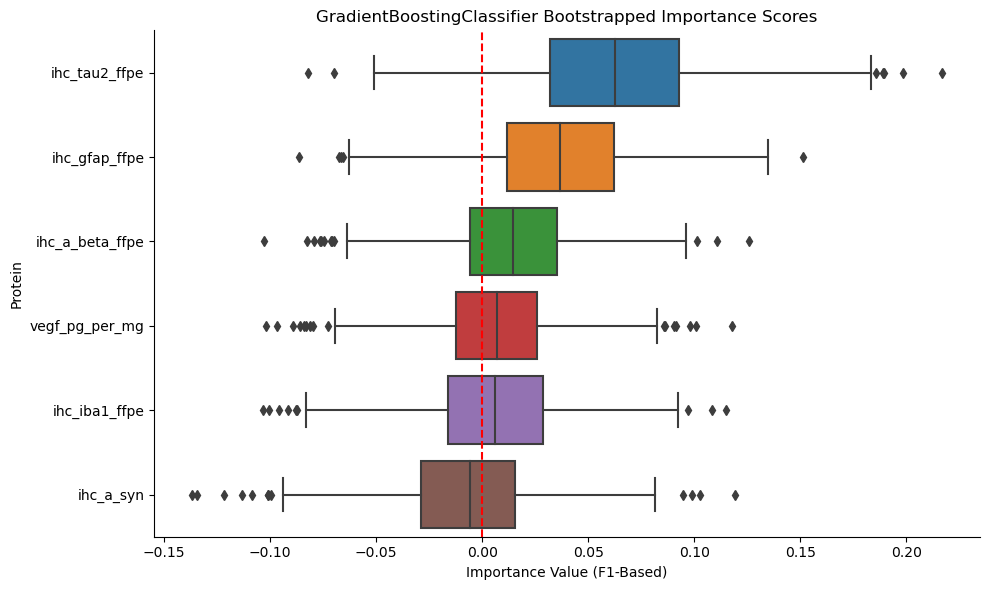

In [40]:
# Code from Camaron Mangham

plt.figure(figsize=(10, 6))
sns.boxplot(coefs_df[descending_sort], orient= 'h',)
y_labels = protein_ids_ranking['protein_id']
plt.yticks(range(len(y_labels)), y_labels)
plt.title('GradientBoostingClassifier Bootstrapped Importance Scores')
plt.xlabel('Importance Value (F1-Based)')
plt.ylabel('Protein')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0,color="red",linestyle="--")
plt.tight_layout()
plt.show()